# Import library
# Set params 

In [10]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import skfuzzy as fuzz
import os
import cv2 as cv2
import math as math
import time
from sklearn.metrics.pairwise import euclidean_distances
import operator
import random as random
import imageio as imageio

C = 5
D = 1
M = 2.0
alpha = 0.8
error = 0.01
maxiter = 1000


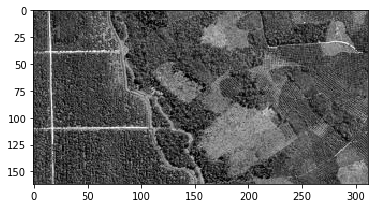

[[ 84.836  50.836  70.195 ... 102.987 120.286 135.226]]
1 50544


In [11]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

img = mpimg.imread('forest.jpg')  
N = img.shape[0] * img.shape[1]
gray = rgb2gray(img)    
plt.imshow(gray, cmap = plt.get_cmap('gray'))
plt.show()

X = gray.reshape(D, N)

print(X)

print(X.shape[0], X.shape[1])


In [12]:
def convertImageToPFRepresentation(X):
    
    X = np.vstack(X)
    
    minX = np.amin(X)
    maxX = np.amax(X)
    
    U = (X - minX) / (maxX - minX)
    
    T = np.ndarray(shape=(1, N))
    
    T = (1.0 - U) * random.randint(1, 99)/100.0
    
    
    
    X = np.vstack((X,U))
    X = np.vstack((X,T))
    
    return X
    

X = convertImageToPFRepresentation(X)

print(X)


[[ 84.836       50.836       70.195      ... 102.987      120.286
  135.226     ]
 [  0.33632927   0.20117426   0.27812914 ...   0.40848217   0.47724824
    0.53663695]
 [  0.25883158   0.31154204   0.28152964 ...   0.23069195   0.20387318
    0.18071159]]


In [ ]:
print(X.shape[0], X.shape[1])

def normalizeX(X): 
    
    minX = np.amin(X)
    maxX = np.amax(X)
    
    X = (X - minX) / (maxX - minX)
        
    return X
    
def initU(X):
    
    U = np.ndarray(shape=(N, D), dtype=float)
    
    U = X
    
    return U    

# Fix randomness 

def initT(X, U):
    
    T = np.ndarray(shape=(N), dtype=float)
            
    T = (1.0 - U) * np.random.randint(1,101) / 100.0
        
    return T


def initW(X, U, T):
    
    W = np.ndarray(shape=(N, D), dtype=float)
        
    E = U + T
    F = np.power(E, alpha)    
    W = 1.0 - E - np.power((1.0 - F), (1.0/alpha))
            
    return W


def initV(X):
    
    V = np.ndarray(shape=(C, 3), dtype=float)
    
    for u_col, w_col in zip(X[:,0], X[:,2]):
        uw_col_exp = math.pow((u_col * (2.0 - w_col)), M)
        uw_col_exp = uw_col_exp.tolist()
        print(uw_col_exp)
        temp = list()
        for i in range(N):
            X[i] = list(X[:,1][i])
            prod = [uw_col_exp[i] * x  for x in X[i]]
            temp.append(prod)
        numer = map(sum, zip(*temp)) 
    return V


# Normalize X 
print(X, np.amin(X), np.amax(X))
X = normalizeX(X)
    
# Initialize U,T,W,V    

U = initU(X)
T = initT(X, U)
W = initW(X, U, T)

print(X)
print(U)
print(T)
print(W)

X = np.vstack((U,T,W))
X = X.T

V = initV(X)




# Update U,T,W,V

In [ ]:
def pf_distance(x, v):
    
    temp = x - v
    temp = np.abs(temp)
    
    distance = np.sum(temp)
    
    return distance
    

    
for i in range(N):
    distances[i] = [pf_distance(X[i], V[j])]


# Loop

In [ ]:
def pfc(X, C, M, alpha, error, maxiter):
    
    while iter <= maxiter:
        
        distances = caculateDistances(X, U, T, W)
        V = updateV(X)
        X_old = X
        X = updateU(X)
        X = updateT(X)
        X = updateW(X)
        
        iter += 1
    
    return V, X

V, X = pfc(X, C, M, alpha, error, maxiter)
    

In [ ]:
A = [[1, 2, 3, 4], [5, 6, 7, 8]]
B = [['A', 'B', 'C', 'D'], ['E', 'F', 'G', 'H']]

for a in zip(*A):
    for b in zip(*B):
        print(a,b)

# Convert rgb to greyscale 

In [ ]:
from scipy import misc
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import sys as sys
import imageio as imageio


image = imageio.imread("forest.jpg")

print (image.shape)

# Intialize a new array of zeroes with the same shape
grey = np.zeros((image.shape[0],image.shape[1]));
grey2 = np.zeros((image.shape[0],image.shape[1]));

# 'Human' Average - adapted for human eyes
def average1(pixel):
    return (0.299*pixel[0] + 0.587*pixel[1] + 0.114*pixel[2])/3

# Raw Average 
def average2(pixel):
    return np.average(pixel);

# Map averages of pixels to the grey image
for r in range(len(image)): 
    for c in range(len(image[r])): 
        # Use human average
        grey[r][c] = average1(image[r][c]);

plt.imshow(grey, cmap = matplotlib.cm.Greys_r) 
plt.show()
